In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("job_description_matcher.csv")
df

,resume_id,name,resume_title,resume_skills,projects,experience_years,education_level,education_percentage,email_id,phone_number,location
0,1,Alexis Garner,DevOps Engineer,"Communication, Project Management, Machine Lea...",E-commerce Platform; Recommendation Engine; HR...,6,High School,82.70,alexis.garner@example.com,+91-95936-86640,Bangalore
1,2,Joshua Webb,Machine Learning Engineer,"Communication, React, Problem Solving, Project...",Inventory System,12,Bachelor's,81.15,joshua.webb@example.com,+91-90375-51378,Chennai
2,3,Melissa Martin,Machine Learning Engineer,"Excel, Tableau, Linux, HTML, Communication",Inventory System,0,Bachelor's,74.19,melissa.martin@example.com,+91-86919-15279,Hyderabad
3,4,Emma Thompson,Data Analyst,"SQL, Power BI, Tableau, Project Management, CS...",Data Dashboard,5,Master's,71.15,emma.thompson@example.com,+91-88785-45488,Kolkata
4,5,Shelley Young,DevOps Engineer,"Project Management, Tableau, TensorFlow, Docke...",Web Crawler,3,PhD,78.12,shelley.young@example.com,+91-89412-29927,Chennai
...,...,...,...,...,...,...,...,...,...,...,...
10095,3788,Jeffrey Peterson,Web Developer,"Data Analysis, Machine Learning, Tableau, SQL,...",Sentiment Analyzer; Data Dashboard,7,PhD,94.40,jeffrey.peterson@example.com,+91-98453-73628,Mumbai
10096,9190,William Woods,Frontend Developer,"Git, Power BI, Project Management, CSS, Linux,...",IoT Home Automation,4,High School,69.09,william.woods@example.com,+91-91724-41666,Chennai
10097,7826,David Cobb,Machine Learning Engineer,NaN,E-commerce Platform,3,Bachelor's,94.71,david.cobb@example.com,+91-75701-65628,Bangalore
10098,7540,Lauren Hayes,Product Manager,"Power BI, Tableau, Data Analysis, CSS, React",Recommendation Engine; Data Dashboard; Invento...,0,Bachelor's,85.79,lauren.hayes@example.com,+91-99107-75541,Delhi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   resume_id             10100 non-null  int64  
 1   name                  10100 non-null  object 
 2   resume_title          10100 non-null  object 
 3   resume_skills         9794 non-null   object 
 4   projects              9999 non-null   object 
 5   experience_years      10100 non-null  object 
 6   education_level       9798 non-null   object 
 7   education_percentage  10100 non-null  float64
 8   email_id              10000 non-null  object 
 9   phone_number          10100 non-null  object 
 10  location              10100 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 868.1+ KB


In [4]:
df.shape

(10100, 11)

In [5]:
df.isnull().sum()

resume_id                 0
name                      0
resume_title              0
resume_skills           306
projects                101
experience_years          0
education_level         302
education_percentage      0
email_id                100
phone_number              0
location                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

resume_id               0
name                    0
resume_title            0
resume_skills           0
projects                0
experience_years        0
education_level         0
education_percentage    0
email_id                0
phone_number            0
location                0
dtype: int64

In [7]:
# Standardize Text Data
df['education_level'] = df['education_level'].str.title().str.strip()
df['resume_title'] = df['resume_title'].str.title().str.strip()

In [8]:
# Converting object into numeric
df['experience_years'] = pd.to_numeric(df['experience_years'], errors='coerce')
df['experience_years'].dtype

dtype('float64')

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10093     True
10094     True
10095     True
10096     True
10098     True
Length: 9309, dtype: bool

In [10]:
# Removing the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(9219, 11)

In [13]:
df['education_level'].unique()

array(['High School', "Bachelor'S", "Master'S", 'Phd', 'Bachelors'],
      dtype=object)

In [14]:
df[['education_level']] = df[['education_level']].replace({'Bachelors': "Bachelor'S"})

In [15]:
df['phone_number'] = df['phone_number'].str.replace('-', '', regex=False)
df['phone_number'] = df['phone_number'].str.replace(r'^\+91', '+91 ', regex=True)

In [16]:
df['phone_number'].head(5)

0    +91 9593686640
1    +91 9037551378
2    +91 8691915279
3    +91 8878545488
4    +91 8941229927
Name: phone_number, dtype: object

In [17]:
df.head(1)

,resume_id,name,resume_title,resume_skills,projects,experience_years,education_level,education_percentage,email_id,phone_number,location
0,1,Alexis Garner,Devops Engineer,"Communication, Project Management, Machine Lea...",E-commerce Platform; Recommendation Engine; HR...,6.0,High School,82.7,alexis.garner@example.com,+91 9593686640,Bangalore


In [18]:
df['experience_years'] = pd.to_numeric(df['experience_years'], errors='coerce').astype('Int64')
df.head(1)

,resume_id,name,resume_title,resume_skills,projects,experience_years,education_level,education_percentage,email_id,phone_number,location
0,1,Alexis Garner,Devops Engineer,"Communication, Project Management, Machine Lea...",E-commerce Platform; Recommendation Engine; HR...,6,High School,82.7,alexis.garner@example.com,+91 9593686640,Bangalore


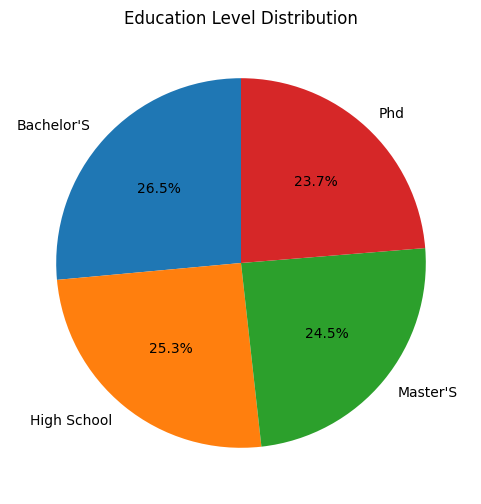

In [19]:
# Pie chart
#autopct='%1.1f%%' displays percentages on the slices with 1 decimal place (e.g., 25.3%).
#startangle=90 starts the pie chart from the top (12 o'clock).

education_counts = df['education_level'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Level Distribution')
plt.show()

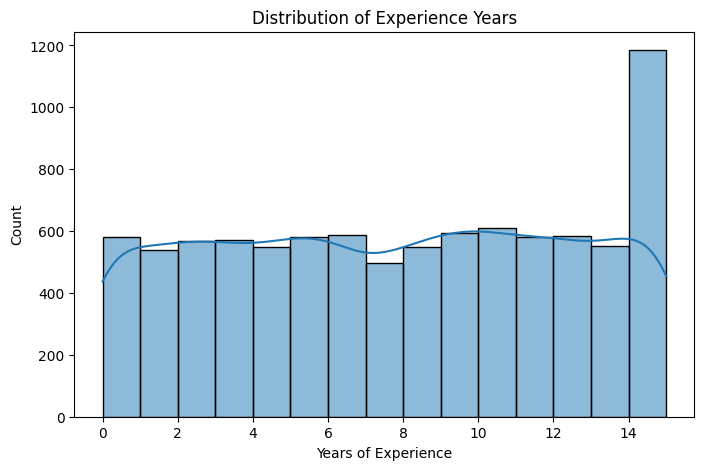

In [20]:
# Histplot
plt.figure(figsize=(8, 5))
sns.histplot(df['experience_years'], bins=15, kde=True)
plt.title('Distribution of Experience Years')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

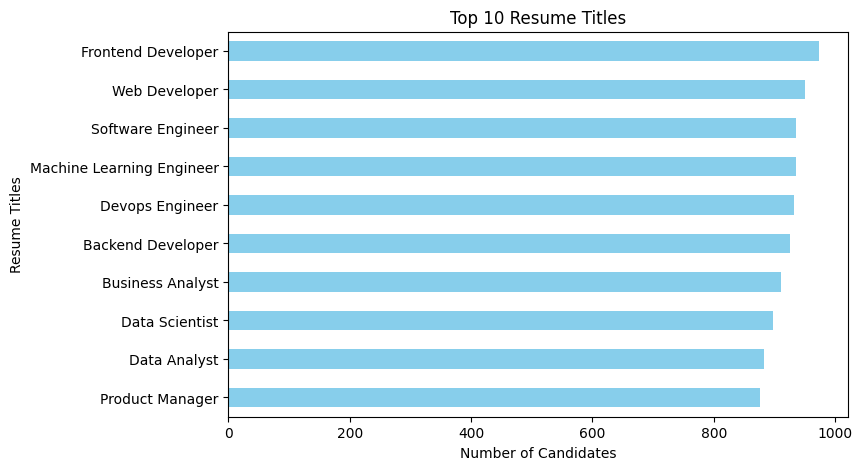

In [21]:
# Bar chart
top_titles = df['resume_title'].value_counts().head(10)
top_titles.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 10 Resume Titles')
plt.xlabel('Number of Candidates')
plt.ylabel('Resume Titles')
plt.gca().invert_yaxis()
plt.show()

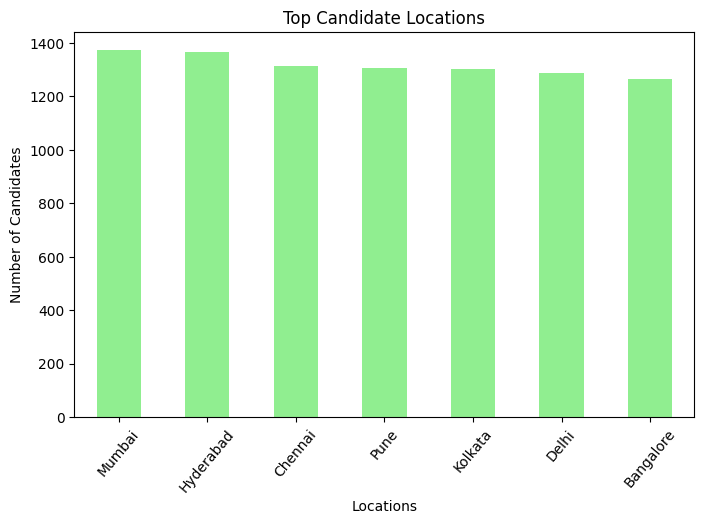

In [22]:
# Bar chart
top_locations = df['location'].value_counts().head(10)
top_locations.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('Top Candidate Locations')
plt.xlabel('Locations')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=50)
plt.show()

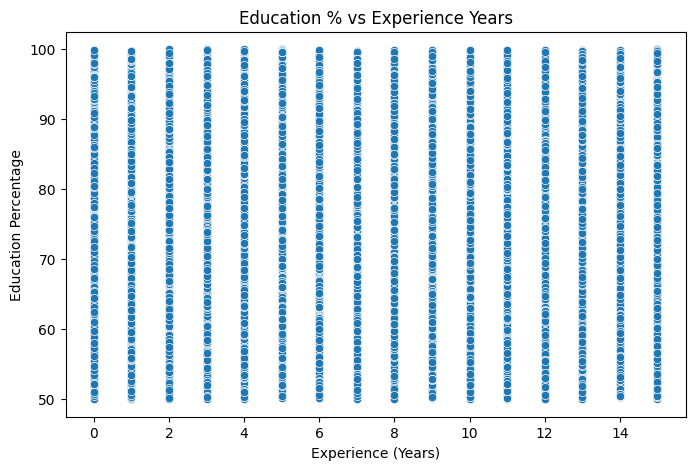

In [23]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='experience_years', y='education_percentage')
plt.title('Education % vs Experience Years')
plt.xlabel('Experience (Years)')
plt.ylabel('Education Percentage')
plt.show()

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


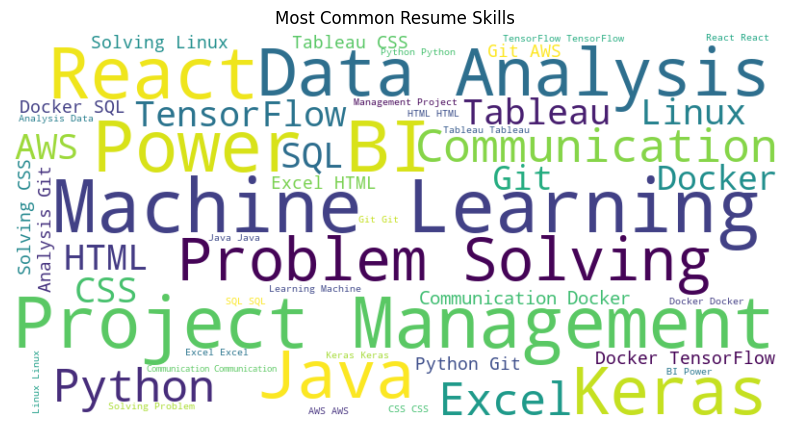

In [25]:
# wordcloud which is used to highlight the most frequently occurring words in a text dataset.
all_skills = ' '.join(df['resume_skills'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Resume Skills')
plt.show()

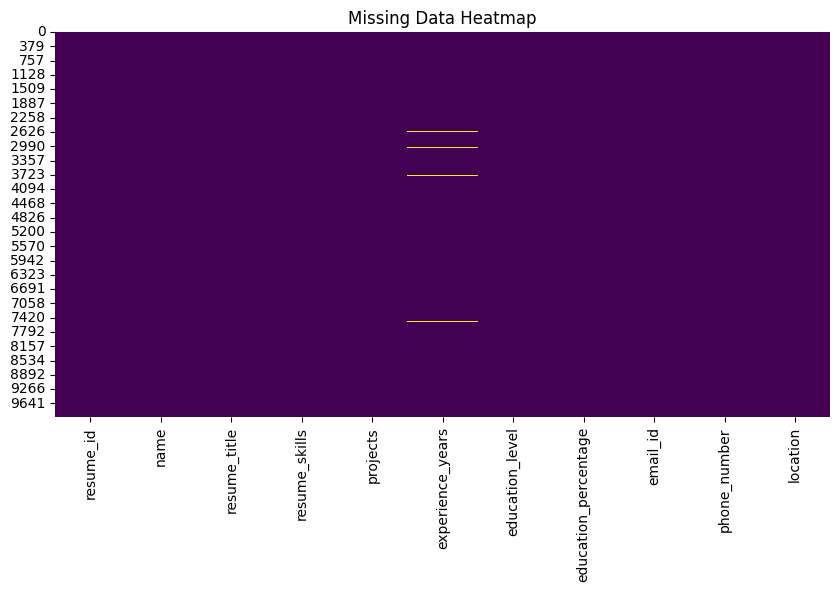

In [26]:
# Heatmap which is used to Visualize where data is missing
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [27]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Handle missing values and Combine Text

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

text_fields = ['resume_skills', 'projects', 'education_level']
df[text_fields] = df[text_fields].fillna("")

df['combined_text'] = (
    df['resume_skills'] + " " +
    df['projects'] + " " +
    df['education_level']
)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["combined_text"])

# 5. Save the model
with open("tfidf_model.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("TF-IDF model trained and saved as tfidf_model.pkl")

TF-IDF model trained and saved as tfidf_model.pkl


In [29]:
# Clean and form Numeric Fields

# Convert to float
df['experience_years'] = pd.to_numeric(df['experience_years'], errors='coerce').astype(float)

# Fill missing with column means
df['experience_years'] = df['experience_years'].fillna(df['experience_years'].mean())
df['education_percentage'] = df['education_percentage'].fillna(df['education_percentage'].mean())

In [30]:
# Encode the label

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['resume_title'])

In [31]:
# Split the data into test and train Sets

from sklearn.model_selection import train_test_split

X = df[['combined_text', 'experience_years', 'education_percentage']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Building Machine Learning Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english'), 'combined_text'),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['experience_years', 'education_percentage'])
    ]
)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [34]:
# Train the model

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('text', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.09002169197396963
                           precision    recall  f1-score   support

        Backend Developer       0.08      0.09      0.08       191
         Business Analyst       0.11      0.12      0.12       172
             Data Analyst       0.06      0.05      0.06       168
           Data Scientist       0.08      0.08      0.08       172
          Devops Engineer       0.10      0.11      0.11       191
       Frontend Developer       0.08      0.10      0.09       201
Machine Learning Engineer       0.18      0.12      0.15       209
          Product Manager       0.09      0.09      0.09       161
        Software Engineer       0.08      0.09      0.09       180
            Web Developer       0.05      0.04      0.05       199

                 accuracy                           0.09      1844
                macro avg       0.09      0.09      0.09      1844
             weighted avg       0.09      0.09      0.09      1844



In [36]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [37]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%%writefile match_my_resume.py
import streamlit as st
import pandas as pd
import fitz  # PyMuPDF
import smtplib
import time
import matplotlib.pyplot as plt
from email.mime.text import MIMEText
import re
from io import BytesIO
from PIL import Image
import base64
import os

# ----- Page Configuration -----
st.set_page_config(page_title="Resume to Job Matcher", layout="centered")

# ----- Helper: Load and Encode Background Image -----
def set_background(image_file):
    with open(image_file, "rb") as image:
        encoded = base64.b64encode(image.read()).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url("data:image/jpg;base64,{encoded}");
            background-size: cover;
            background-attachment: fixed;
            background-position: center;
        }}
        </style>
        """,
        unsafe_allow_html=True,
    )

# Set the background
if os.path.exists("Background.jpg"):
    set_background("Background.jpg")

# ----- Custom CSS -----
st.markdown("""
    <style>
        .title-text {
            font-size: 35px;
            font-weight: bold;
            color: #000000;
            text-align: center;
            margin-bottom: 20px;
        }
        .desc-text {
            font-size: 20px;
            color: #000000;
            font-weight: bold;
            text-align: center;
            margin-bottom: 30px;
        }
    </style>
""", unsafe_allow_html=True)

# ----- Banner Image (Top) -----
if os.path.exists("banner.png"):
    try:
        image = Image.open("banner.png")
        resized_image = image.resize((800, 250))
        st.image(resized_image)
    except Exception as e:
        st.warning(f"Failed to load banner image: {e}")
else:
    st.info("Banner image not found. Please add 'banner.png' to the app folder.")

# ----- Title and Description -----
st.markdown('<div class="title-text">📄 Resume to Job Matcher</div>', unsafe_allow_html=True)
st.markdown('<div class="desc-text",>Upload resumes in PDF format and automatically extract job titles, skills, and more!</div>', unsafe_allow_html=True)

# ----- PDF Text Extraction -----
def extract_text_from_pdf(uploaded_pdf):
    text = ""
    try:
        with fitz.open(stream=uploaded_pdf.read(), filetype="pdf") as doc:
            for page in doc:
                text += page.get_text()
    except Exception as e:
        st.error(f"Error reading PDF: {e}")
    return text

def extract_field(text, field_name):
    pattern = rf"{field_name}:\s*(.*)"
    match = re.search(pattern, text, re.IGNORECASE)
    return match.group(1).strip() if match else ""

def extract_experience(text):
    pattern = r"experience_years:\s*(\d+)"
    match = re.search(pattern, text, re.IGNORECASE)
    return int(match.group(1)) if match else 0

def send_email(recipient_email, subject, body):
    sender_email = st.secrets.get("EMAIL")
    sender_password = st.secrets.get("PASSWORD")

    if not sender_email or not sender_password:
        st.error("Email credentials not found in Streamlit secrets!")
        return False

    msg = MIMEText(body)
    msg["Subject"] = subject
    msg["From"] = sender_email
    msg["To"] = recipient_email

    try:
        with smtplib.SMTP("smtp.gmail.com", 587) as server:
            server.starttls()
            server.login(sender_email, sender_password)
            server.send_message(msg)
        return True
    except Exception as e:
        st.warning(f"Error sending email to {recipient_email}: {e}")
        return False

def determine_title(skills_text, projects_text):
    combined = f"{skills_text} {projects_text}".lower()
    if re.search(r"\b(data science|pandas|matplotlib|data analyst)\b", combined):
        return "Data Scientist"
    elif re.search(r"\b(machine learning|regression|classification|sklearn)\b", combined):
        return "Machine Learning Engineer"
    elif re.search(r"\b(full stack|react|node\.js|frontend|backend)\b", combined):
        return "Full Stack Developer"
    elif re.search(r"\b(web design|html|css|javascript|web designer)\b", combined):
        return "Web Designer"
    elif re.search(r"\b(artificial intelligence|deep learning)\b", combined):
        return "AI Engineer"
    elif re.search(r"\b(ui/ux|figma|adobe xd|user interface|user experience)\b", combined):
        return "UI/UX Designer"
    elif re.search(r"\b(game dev|unity|unreal|game design|game developer)\b", combined):
        return "Game Designer"
    else:
        return "Unknown"

# ----- Upload Resumes -----
st.markdown("### 📤 Upload Your Resumes (PDFs only)")
uploaded_files = st.file_uploader("Upload here", type=["pdf"], accept_multiple_files=True)

all_resume_data = []

if uploaded_files:
    for uploaded_file in uploaded_files:
        message_placeholder = st.empty()
        message_placeholder.success(f"✅ '{uploaded_file.name}' uploaded successfully!")
        time.sleep(1.5)
        message_placeholder.empty()

        resume_text = extract_text_from_pdf(uploaded_file)
        resume_data = {
            "name": extract_field(resume_text, "Name") or uploaded_file.name.replace(".pdf", "").title(),
            "resume_skills": extract_field(resume_text, "resume_skills"),
            "projects": extract_field(resume_text, "Projects"),
            "experience_years": extract_experience(resume_text),
            "email": extract_field(resume_text, "Email")
        }

        resume_data["resume_title"] = determine_title(resume_data["resume_skills"], resume_data["projects"])
        all_resume_data.append(resume_data)

    resume_df = pd.DataFrame(all_resume_data)
    selected_df = resume_df[resume_df["resume_title"] != "Unknown"]
    rejected_df = resume_df[resume_df["resume_title"] == "Unknown"]

    # ----- Pie Chart -----
    if not resume_df.empty:
        st.subheader("📊 Resume Screening Summary")
        counts = [len(selected_df), len(rejected_df)]
        labels = ['Selected', 'Rejected']
        colors = ['#4CAF50', '#FF5252']

        fig, ax = plt.subplots()
        ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops=dict(color="white"))
        ax.axis('equal')
        st.pyplot(fig)

    st.subheader("✅ Selected Candidates")
    st.dataframe(selected_df)

    st.subheader("❌ Rejected Candidates")
    st.dataframe(rejected_df)

    # ----- Bar Chart: Job Title Distribution -----
    st.subheader("📊 Job Title Distribution")
    if not resume_df.empty:
        st.bar_chart(resume_df["resume_title"].value_counts())

    # ----- Download Buttons -----
    if not selected_df.empty:
        excel_buffer = BytesIO()
        selected_df.to_excel(excel_buffer, index=False, engine="openpyxl")
        st.download_button("📥 Download Selected Candidates", data=excel_buffer.getvalue(), file_name="selected_candidates.xlsx")

    if not rejected_df.empty:
        reject_buffer = BytesIO()
        rejected_df.to_excel(reject_buffer, index=False, engine="openpyxl")
        st.download_button("📥 Download Rejected Candidates", data=reject_buffer.getvalue(), file_name="rejected_candidates.xlsx")

    # ----- Send Emails -----
    if st.button("📧 Send Emails"):
        selected_sent = 0
        rejected_sent = 0

        for _, row in selected_df.iterrows():
            if not row["email"]:
                continue
            subject = "Congratulations! You've Been Selected"
            body = f"Hi {row['name']}, you’ve been selected for the role: {row['resume_title']}!"
            if send_email(row["email"], subject, body):
                selected_sent += 1

        for _, row in rejected_df.iterrows():
            if not row["email"]:
                continue
            subject = "Application Update"
            body = "Sorry, your profile is not matching this job. We will meet soon."
            if send_email(row["email"], subject, body):
                rejected_sent += 1

        st.success(f"Emails sent: ✅ {selected_sent} selected, ❌ {rejected_sent} rejected.")


Overwriting match_my_resume.py
